# Solução Numérica

Estamos tentando resolver o sistema de equações abaixo:
\begin{equation}
\left\{\begin{matrix}
&\frac{\partial h}{\partial \eta} = -ibh,
\\
&\frac{\partial^2 p}{\partial \xi^2} + \frac{(2m+1)}{\xi}\frac{\partial p}{\partial \xi} + \xi^{2m}|p|^2p + bp = 0 \end{matrix}\right.
\end{equation}

A primeira equação possui uma solução analítica:

$$h(\eta) = h(0)e^{-ib\eta}$$

A segunda resolvemos numericamente nos limitando para o caso onde $p \in \mathbb{R}$, isto é
\begin{equation}
\frac{\partial^2 p}{\partial \xi^2} + \frac{\partial p}{\partial \xi} = -\frac{\xi^{2m+1}}{2m+1}p^3 - \frac{\xi }{2m+1}bp
\end{equation}

Para solucionar a equação acima utilizando o método `odeint` presente na biblioteca do python `scipy`, transformamos a equação acima em um sistema de equações diferenciais ordinarias de primeira ordem:

\begin{equation}
\left\{\begin{matrix}
& \theta = \frac{\partial p}{\partial \xi},
\\
&\frac{\partial \theta}{\partial \xi} = -\frac{(2m+1)}{\xi}\theta - \xi^{2m}p^3 - bp \end{matrix}\right.
\end{equation}

Cujas condições iniciais são:

\begin{gather}
p(0) = 1, \\
\frac{\partial p}{\partial \xi}(0) \equiv \theta(0) = 0.
\end{gather}

### Importando bibliotecas

#### Sobre scipy.integrate.odeint:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import odeint
plt.rc('figure', figsize=(14, 6))



## Parâmetros de caracterização do feixe

In [3]:
w0 = 200e-6 # [200 micrometros]
    
xi_span = np.linspace(.001, 20, 400)

## Definindo o modelo para a EDO a ser resulvida numericamente

In [4]:
def model_p(y, xi, b, m):
    p, theta = y
    
    dydxi = [theta,
             - ( (2 * m + 1) / xi ) * theta - (xi ** (2 * m) ) * p ** (3) - (b * p)]
    return dydxi

## Fixamos b = 0

Text(0.5, 1.0, 'Solução numérica para a equação diferencial')

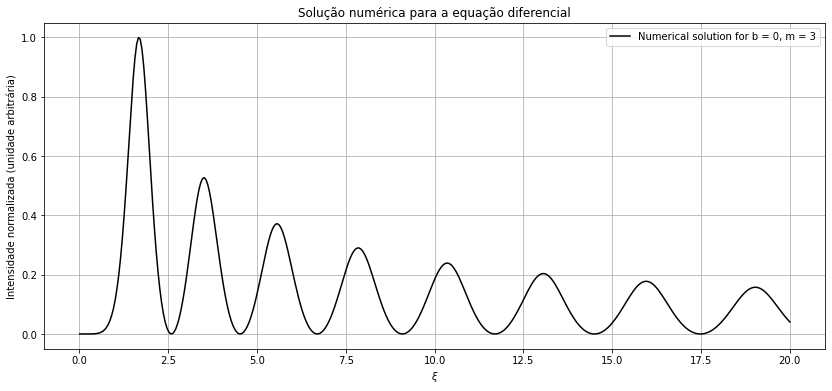

In [5]:
y0 = [1, 0]  # initial conditions

# Argumentos
b = 0
m = 3

xi_span = np.linspace(.01, 20, 400)  # espaço discretizado da coordenada xi
solucao = odeint(model_p, y0, xi_span, args=(b,m))



intensity = abs(xi_span**m  * solucao[:,0]) ** 2
normalized_intensity = intensity / intensity.max()

plt.plot(xi_span, normalized_intensity, 'k', label=f'Numerical solution for b = {b}, m = {m}')
plt.xlabel(r'$\xi$')
plt.ylabel(r'Intensidade normalizada (unidade arbitrária)')
plt.legend(loc='best')
plt.grid()
plt.title(r'Solução numérica para a equação diferencial')

## Conversão entre $\xi$  e a coordenada radial $r$:

In [6]:
# Caracterização do feixe
lamb = 1064e-9  # [m]
w0 = 200e-6  # [m]
k0 = 2 * np.pi / lamb  # [m]
zR = k0 * w0 ** 2 /2  # approx [0.12m] (0.11810498697705989)
c = 3 * 10 ** 8  # [m/s]
omega = c * k0  # [1/s]
chi3 = 1e-22  # commom value for chi3 in material
R = 2 / (np.pi)  # overlap constant
g = (3 * omega ** 2 * chi3 * R) / (2 * k0 * (c ** 2))

In [20]:
print(f"Constante de recobrimento: {R:.2f} (adimensional)")
print(f"Número de onda: {k0:.2f} [m^(-1)] (approx 5.9x10^6 [m^(-1)])")
print(f"Constante g: {g}")

const= np.sqrt(2 * g * k0)
radial_coord = xi_span / const


Constante de recobrimento: 0.64 (adimensional)
Número de onda: 5905249.35 [m^(-1)] (approx 5.9x10^6 [m^(-1)])
Constante g: 5.639097744360901e-16


In [8]:
#radial_coord
const  # 8e-5 [m] => 80 um (micrometros)

8.160916404792491e-05

In [11]:
xi_init = 1
radial_coord_init = xi_init / const
radial_coord_init.round(2)

12253.53

## Uma única figura com todos os plots

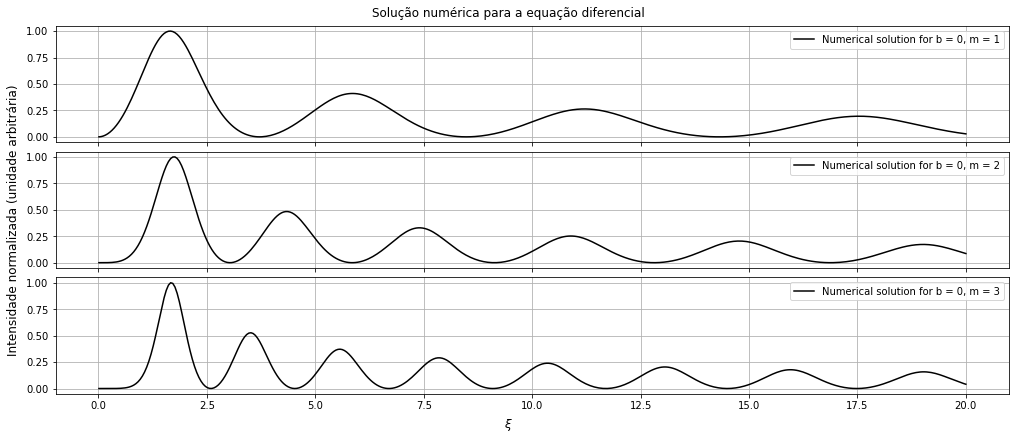

In [94]:
fig = plt.figure(figsize=(14, 6), constrained_layout = True)
gs = fig.add_gridspec(3, 1)

i = 1
b = 0
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle(r'Solução numérica para a equação diferencial')
fig.supxlabel(r'$\xi$')
fig.supylabel('Intensidade normalizada (unidade arbitrária)')
for v in range(3):
    
    m = i

    xi_span = np.linspace(.01, 20, 400)  # espaço discretizado da coordenada xi
    solucao = odeint(model_p, y0, xi_span, args=(b,m))


    intensity = abs(xi_span**m  * solucao[:,0]) ** 2
    normalized_intensity = intensity / intensity.max()
    
    axs[v].plot(xi_span, normalized_intensity, 'k', label=f'Numerical solution for b = {b}, m = {m}')
    #axs[v].set_xlabel(r'$\xi$')
    #axs[v].set_ylabel(r'Intensidade normalizada (unidade arbitrária)')
    axs[v].grid()
    axs[v].legend()
    i+=1